In [1]:
import numpy as np
import matplotlib.pyplot as plt

For the next experiments we will use the same datasets that we previoulsy used.

In [48]:
def generateDataset(num_points_class1,num_points_class2, separable = True):
    if separable:
        class1 = np.array(np.random.multivariate_normal([0.,0.], [[1,-0.9],[-0.9,1]], num_points_class1))
        class2 = np.array(np.random.multivariate_normal([3.,6.], [[1,0],[0,1]], num_points_class2))
    else:
        class1 = np.array(np.random.multivariate_normal([0.,0.], [[1,-0.9],[-0.9,1]], num_points_class1))
        class2 = np.array(np.random.multivariate_normal([1.,2.], [[1,0],[0,1]], num_points_class2))


    nd = np.concatenate((class1, class2), axis=0)
    labels = np.concatenate((-np.ones(num_points_class1),np.ones(num_points_class2)), axis=0)

    return nd,labels

Also, we will define the primal problem. Take into account that in the sumatory, only those values that are positive are relevant.

# Experiment 1

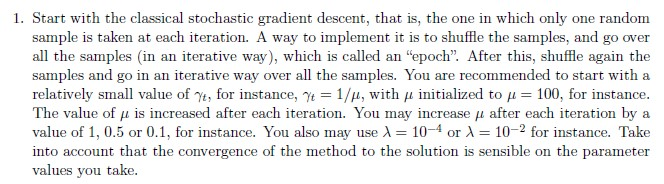

In [75]:
def f(x, y, lmb, w, b):
    sum_value = 1 - y*(np.dot(x, w.T) + b)

    return (lmb/2) * np.dot(w.T, w) + sum_value[sum_value > 0].sum()

def step(w,b, gamma, x, y, lmb):
    if (w.T @ x + b)*y > 1:
        w_new = w - gamma * w * lmb
        b_new = b
    else:
        w_new = w - gamma * (w * lmb - y * x)
        b_new = b + gamma * y
    return w_new, b_new

def stoch_grad(epochs, w,b,lmb, gamma,xs,ys):

    history = []
    randInds = list(range(len(ys)))
    for i in range(epochs):
        np.random.shuffle(randInds)

        for j in randInds:
            w,b = step(w,b,gamma,xs[j],ys[j],lmb)
        history.append(np.log(f(xs, ys, lmb, w, b)))
    return w,b, history


Experiment for gamma_val = 0.001 and lambda_val = 0.01


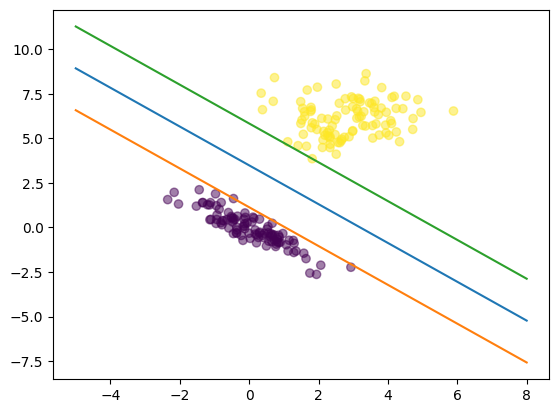

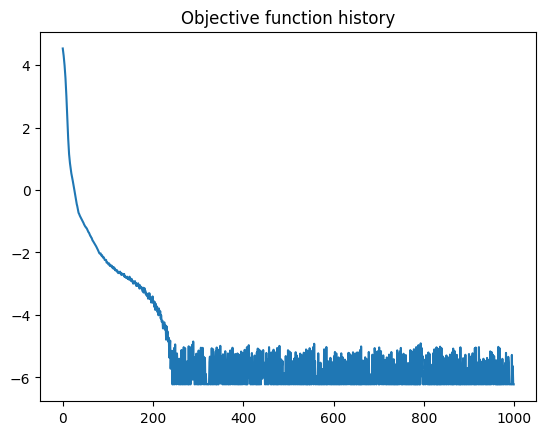

Experiment for gamma_val = 0.001 and lambda_val = 0.0001


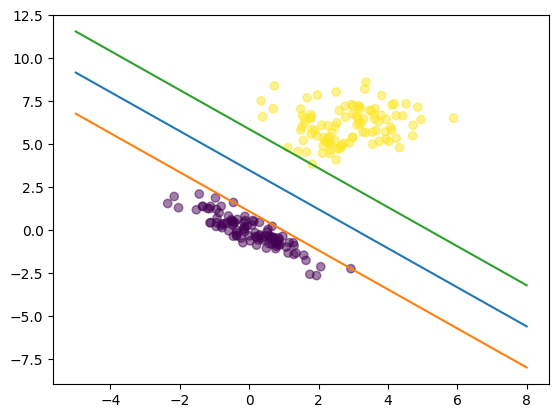

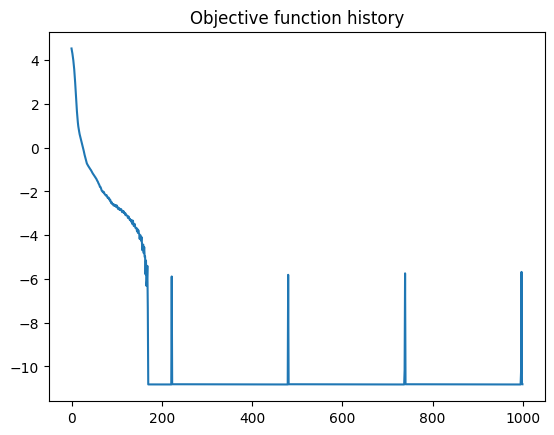

Experiment for gamma_val = 0.5 and lambda_val = 0.01


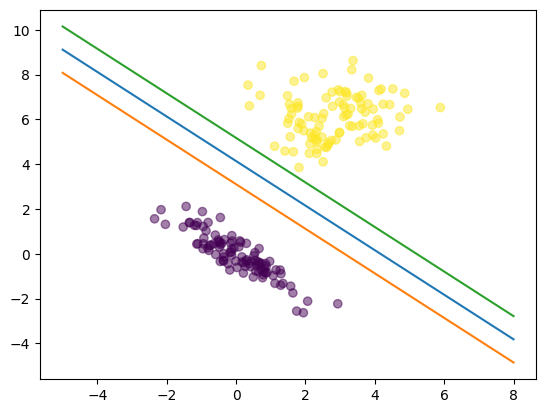

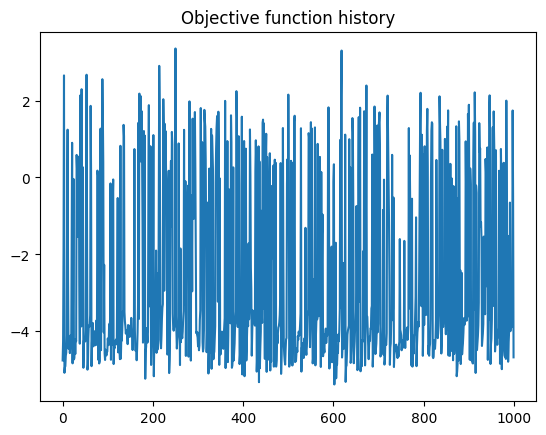

Experiment for gamma_val = 0.5 and lambda_val = 0.0001


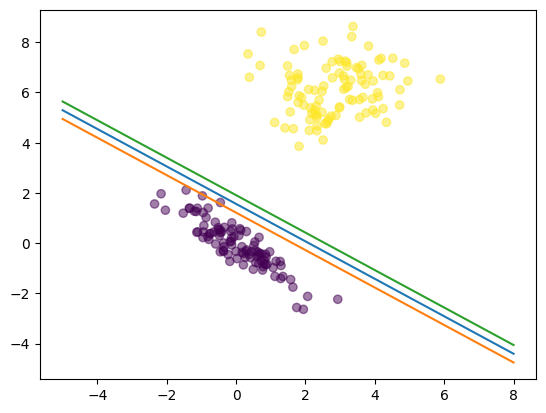

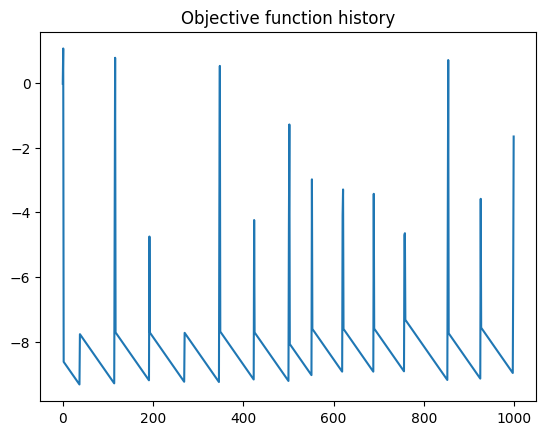

Experiment for gamma_val = 0.1 and lambda_val = 0.01


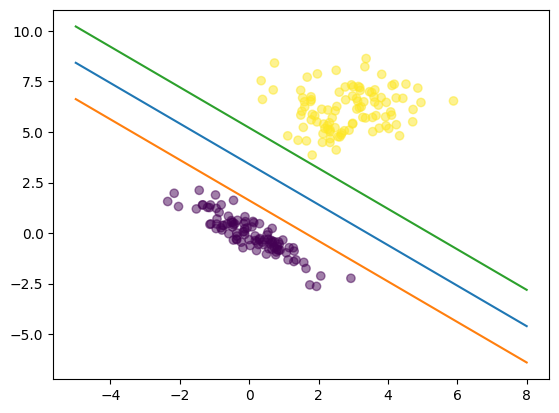

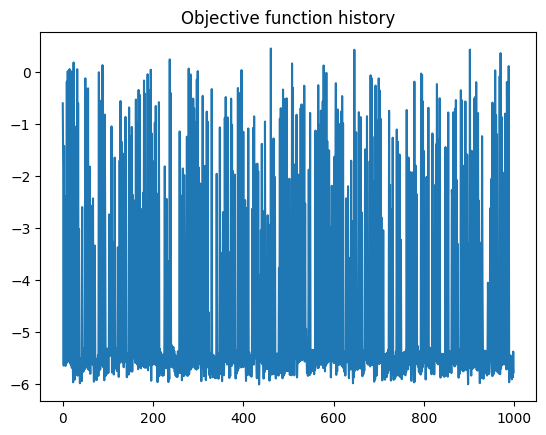

Experiment for gamma_val = 0.1 and lambda_val = 0.0001


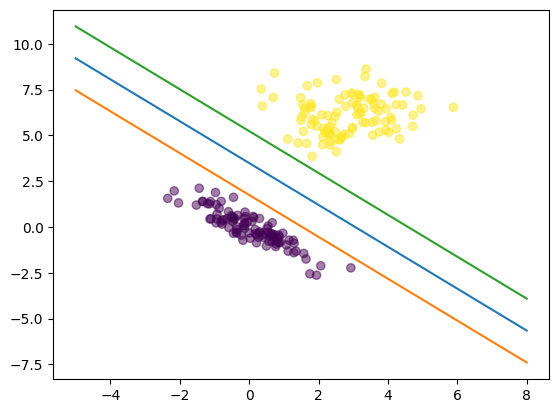

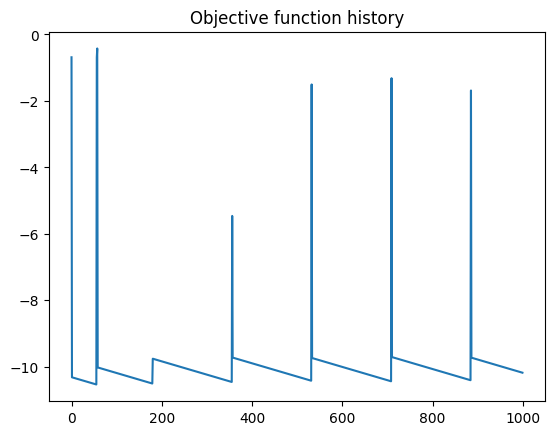

Experiment for gamma_val = 1 and lambda_val = 0.01


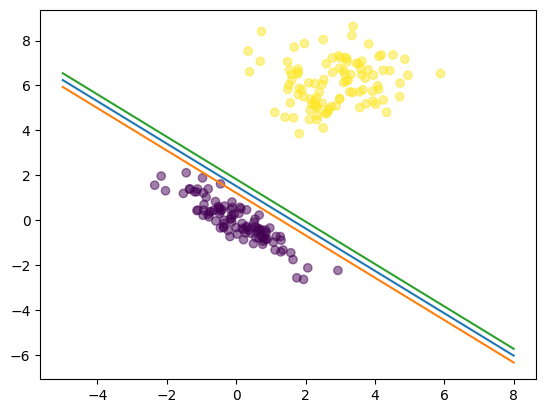

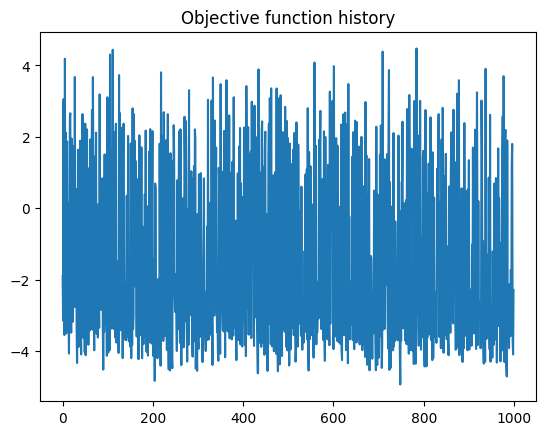

Experiment for gamma_val = 1 and lambda_val = 0.0001


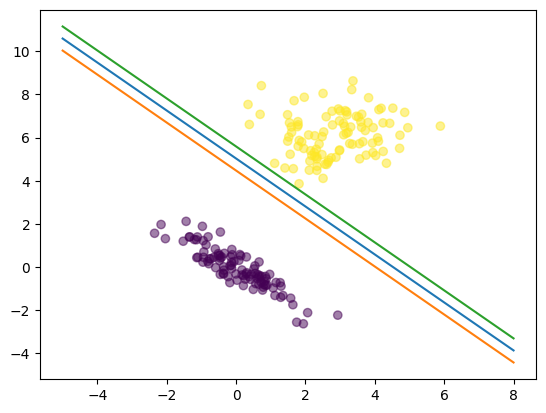

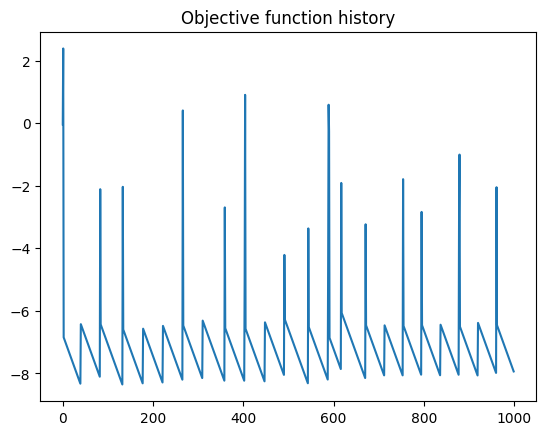

In [84]:
# Generate dataset
X, y = generateDataset(100,100,separable=True)
X = X.reshape(200,2)

for gamma_val in [0.001, 0.5, 0.1, 1]:
    for lambda_val in [1e-2, 1e-4]:
        print("Experiment for gamma_val =", gamma_val, "and lambda_val =", lambda_val)
        # Compute w and b using SGD
        w, b, history= stoch_grad(1000, np.zeros(2), np.zeros(1), lambda_val, gamma_val, X, y)

        # Plot points, margins and hyperplane
        linespace = np.linspace(-5, 5, 100)

        plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
        a = -w[0] / w[1]
        xx = np.linspace(-5, 8)
        yy = (a * xx) - ((b) / w[1])
        yy_max = (a * xx) - ((b+1) / w[1])
        yy_min = (a * xx) - ((b-1) / w[1])
        plt.plot(xx,yy)
        plt.plot(xx,yy_max)
        plt.plot(xx,yy_min)
        plt.show()

        plt.title('Objective function history')
        plt.plot(history)
        plt.show()

From the above plots we can observe that the bigger is the value of $ \lambda $, the bigger are the margins, and the more accurate is the hyperplane separating the classes, although very big values of $ \lambda $ take more iterations to converge.

By changing the rate of $ \mu $ we couldn't notice a big difference, the only observable comment is that with greater values of the increasing rate, the margins are slightly more distant to the class of points. 

# Experiment 2 and 3

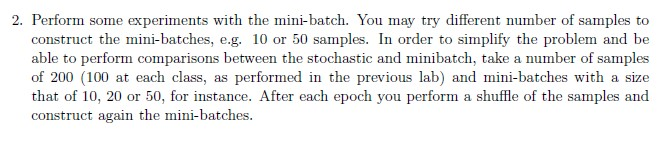

In [80]:
def f1(x, y, lmb, w, b):
    sum_value = 1 - y*(np.dot(x, w.T) + b)

    return (lmb/2) * np.dot(w.T, w) + sum_value[sum_value > 0].sum()

def step_mini_batch(w,b, gamma, xs, ys, lmb):
    sum_w = 0
    sum_b = 0
    for i in range(len(xs)):
        if (w.T @ xs[i] + b)*ys[i] > 1:
            sum_w += 0
            sum_b += 0
        else:
            sum_w +=  - ys[i] * xs[i]
            sum_b += -ys[i]
    w_new = w - gamma * (lmb * w + sum_w)
    b_new = b - gamma * sum_b
    return w_new, b_new

def stoch_grad_mini_batch(epochs, w,b,lmb, gamma,xs,ys, batch_size=10):

    history = []
    randInds = list(range(len(ys)))
    for i in range(epochs):
        np.random.shuffle(randInds)

        for j in range(len(xs)//batch_size + 1):
            inds = randInds[j:min(j+batch_size, len(xs))]
            w,b = step_mini_batch(w,b,gamma,xs[inds],ys[inds],lmb)
        history.append(np.log(f1(xs, ys, lmb, w, b)))

    return w,b, history


Experiment for batch_size= 10 gamma_val = 0.001 and lambda_val = 0.01


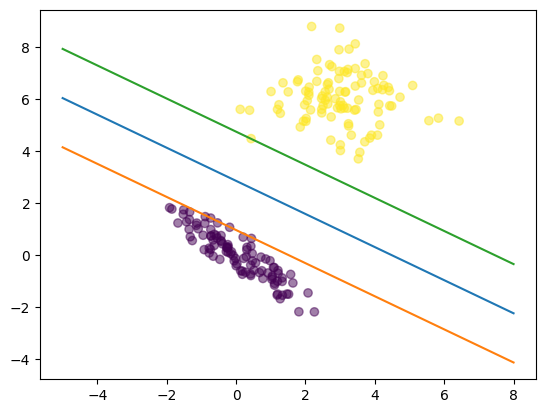

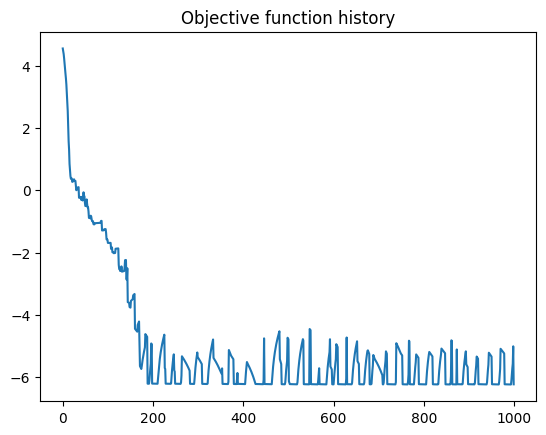

Experiment for batch_size= 20 gamma_val = 0.001 and lambda_val = 0.01


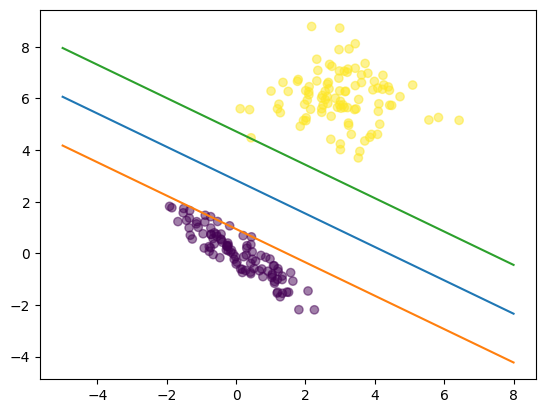

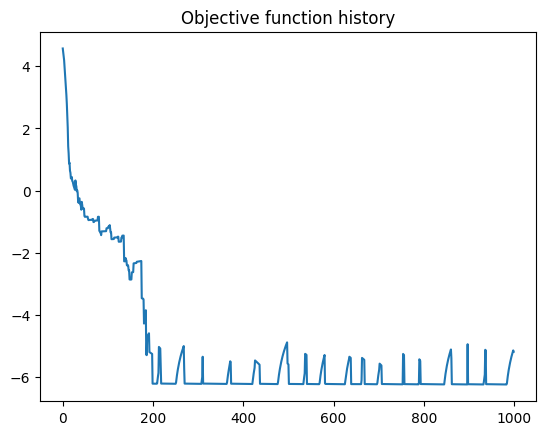

Experiment for batch_size= 50 gamma_val = 0.001 and lambda_val = 0.01


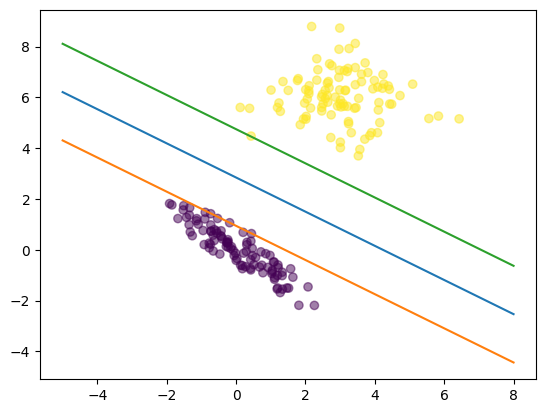

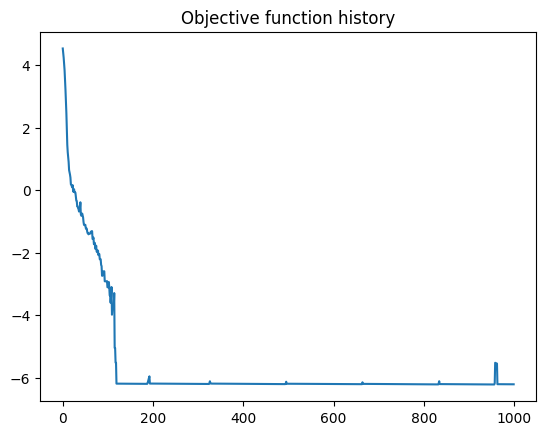

Experiment for batch_size= 10 gamma_val = 0.001 and lambda_val = 0.0001


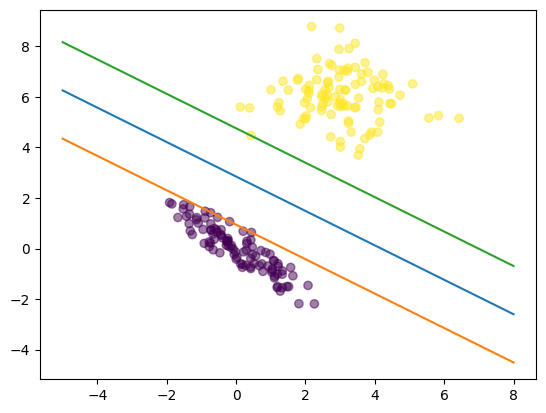

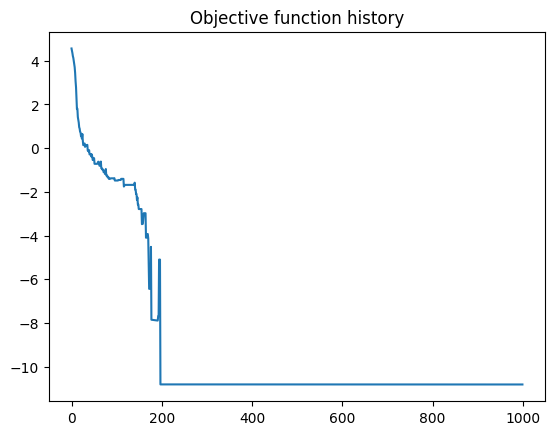

Experiment for batch_size= 20 gamma_val = 0.001 and lambda_val = 0.0001


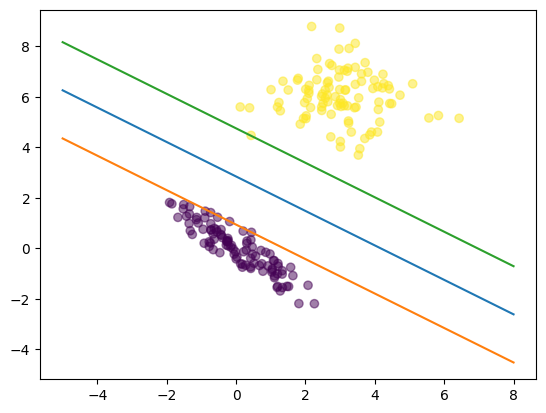

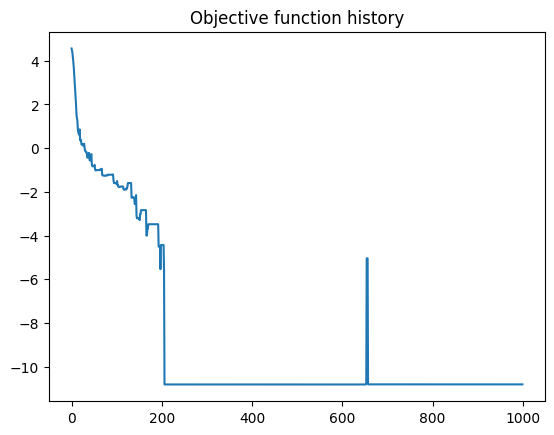

Experiment for batch_size= 50 gamma_val = 0.001 and lambda_val = 0.0001


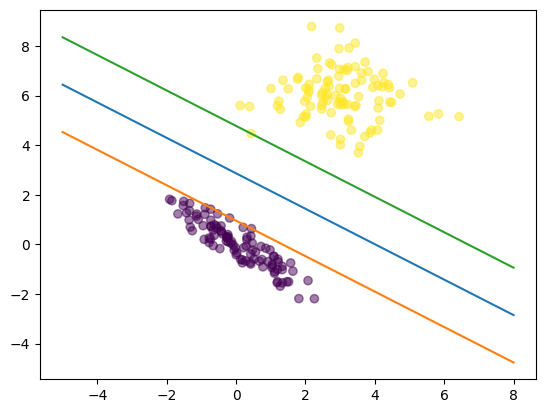

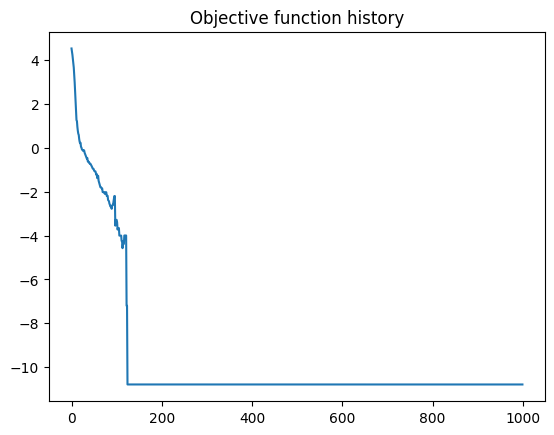

Experiment for batch_size= 10 gamma_val = 0.5 and lambda_val = 0.01


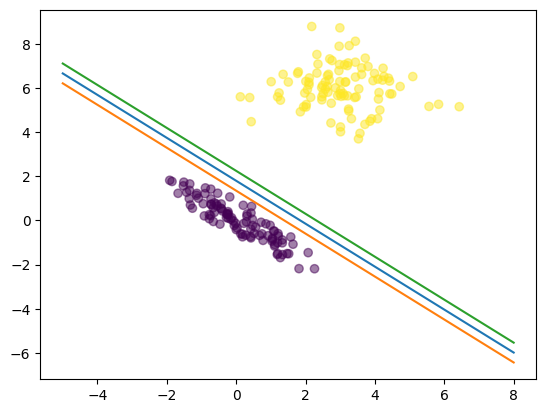

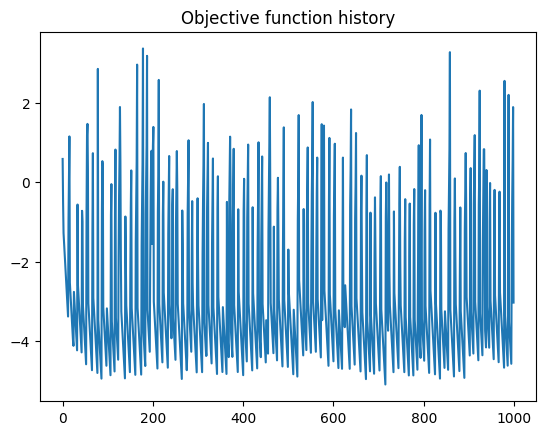

Experiment for batch_size= 20 gamma_val = 0.5 and lambda_val = 0.01


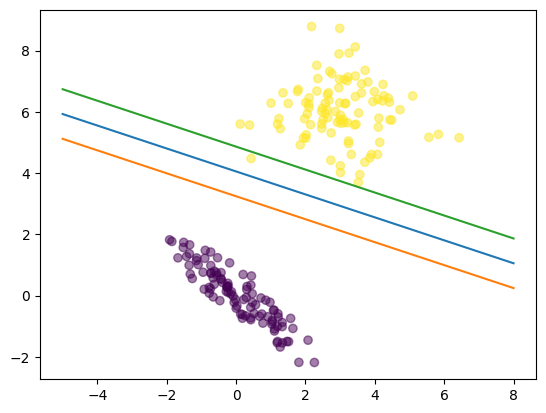

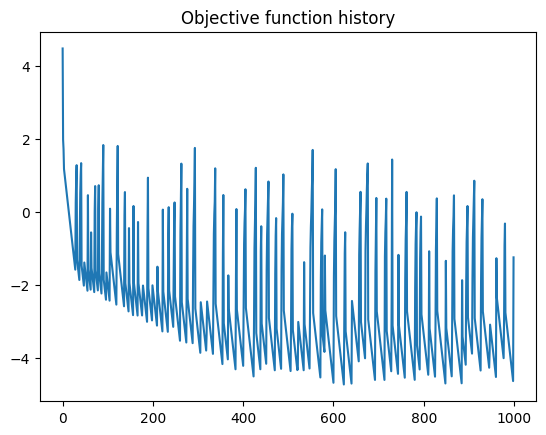

Experiment for batch_size= 50 gamma_val = 0.5 and lambda_val = 0.01


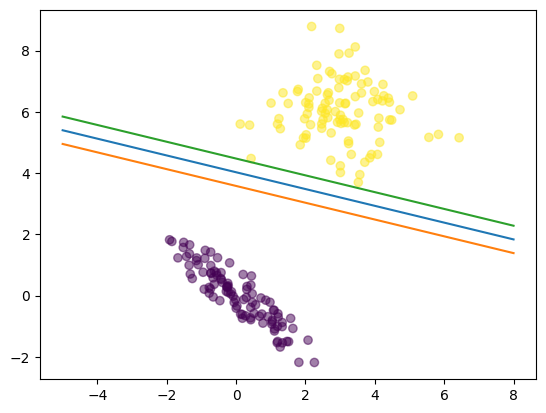

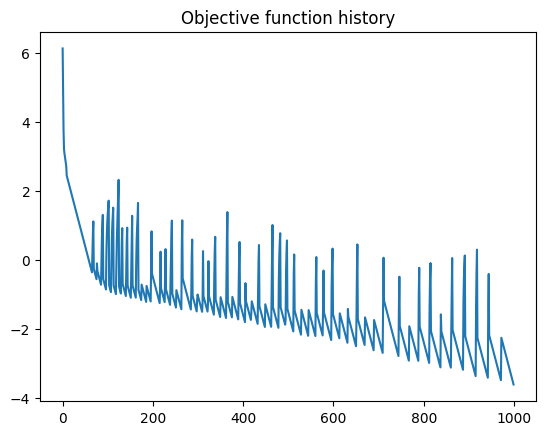

Experiment for batch_size= 10 gamma_val = 0.5 and lambda_val = 0.0001


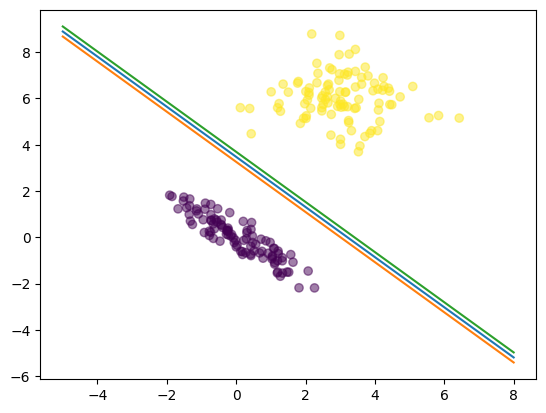

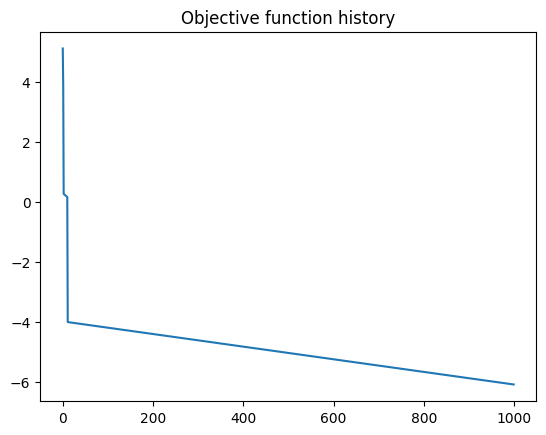

Experiment for batch_size= 20 gamma_val = 0.5 and lambda_val = 0.0001


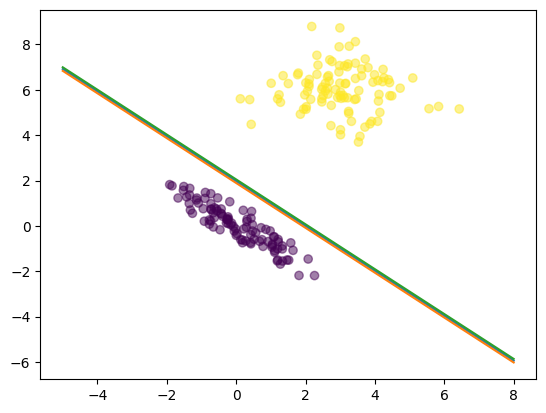

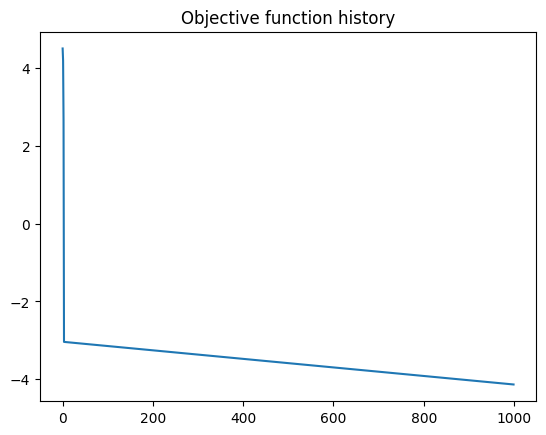

Experiment for batch_size= 50 gamma_val = 0.5 and lambda_val = 0.0001


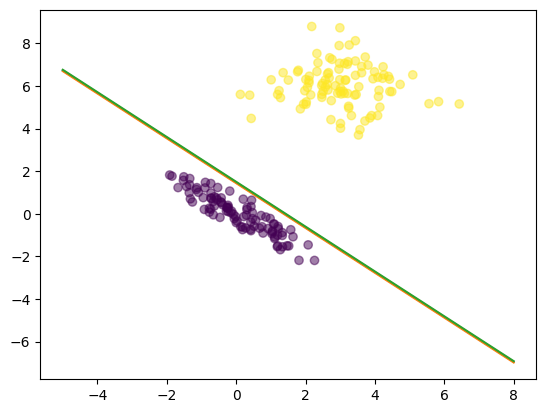

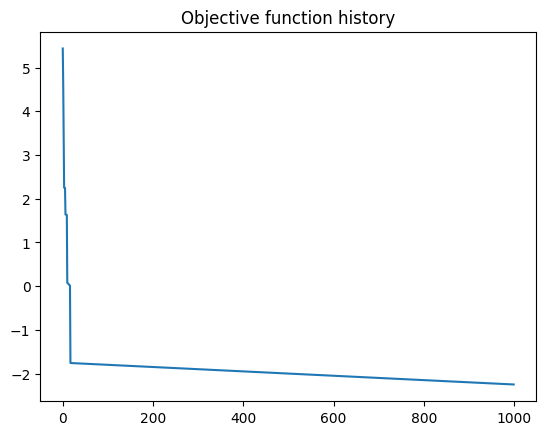

Experiment for batch_size= 10 gamma_val = 0.1 and lambda_val = 0.01


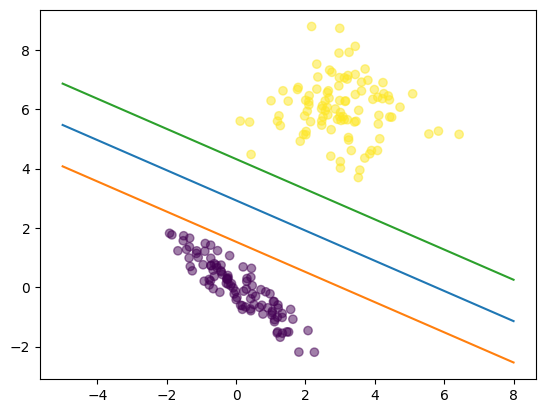

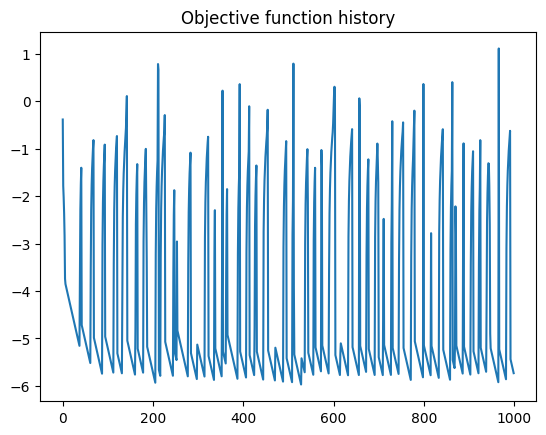

Experiment for batch_size= 20 gamma_val = 0.1 and lambda_val = 0.01


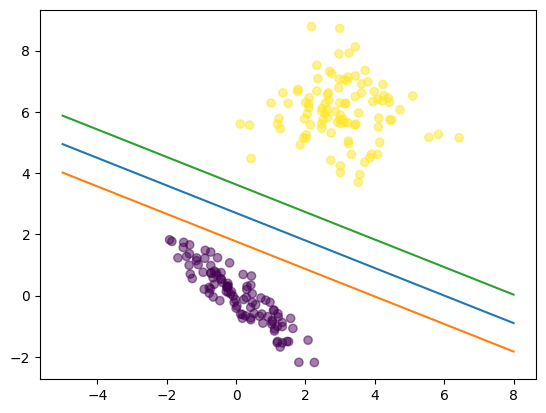

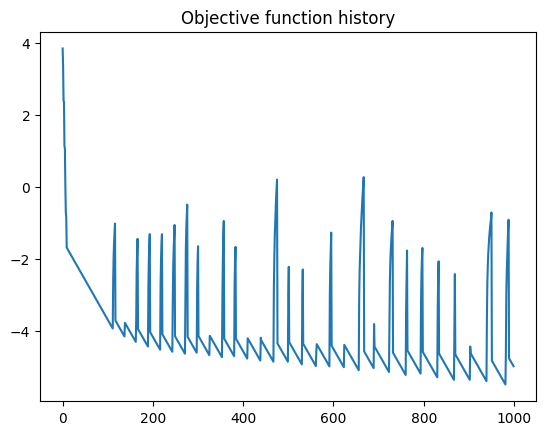

Experiment for batch_size= 50 gamma_val = 0.1 and lambda_val = 0.01


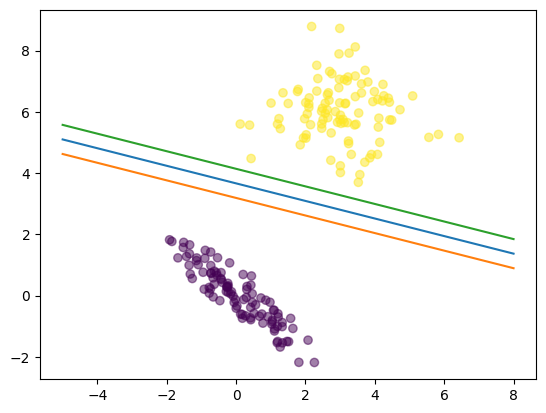

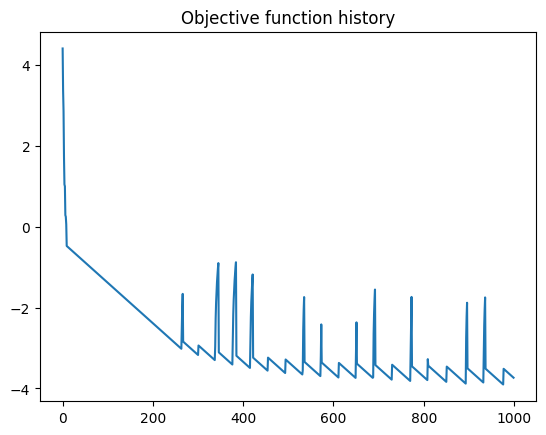

Experiment for batch_size= 10 gamma_val = 0.1 and lambda_val = 0.0001


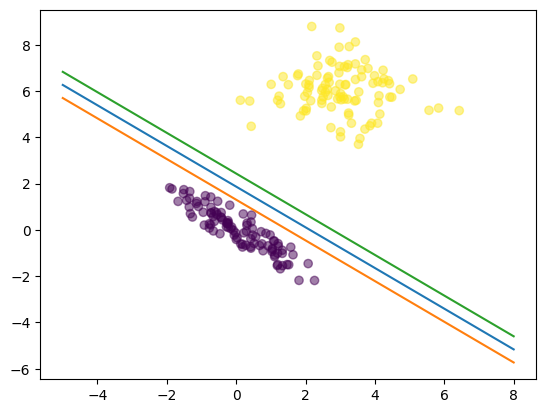

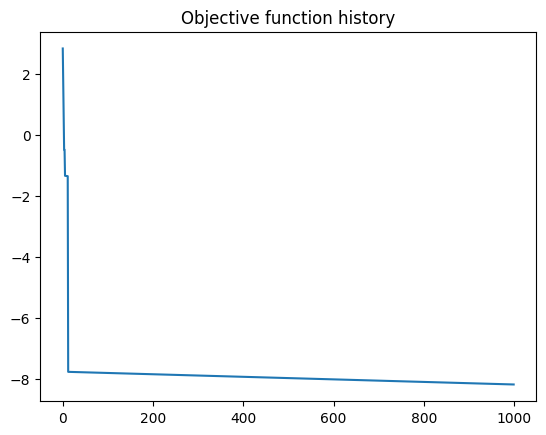

Experiment for batch_size= 20 gamma_val = 0.1 and lambda_val = 0.0001


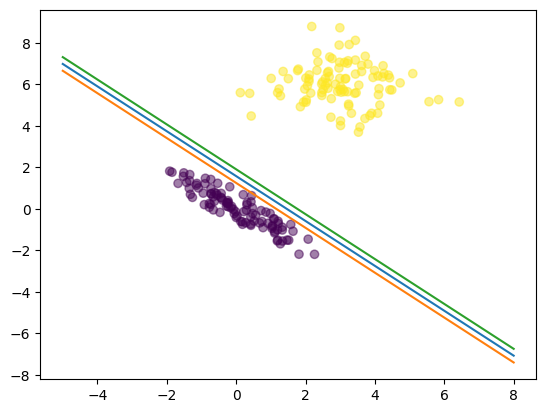

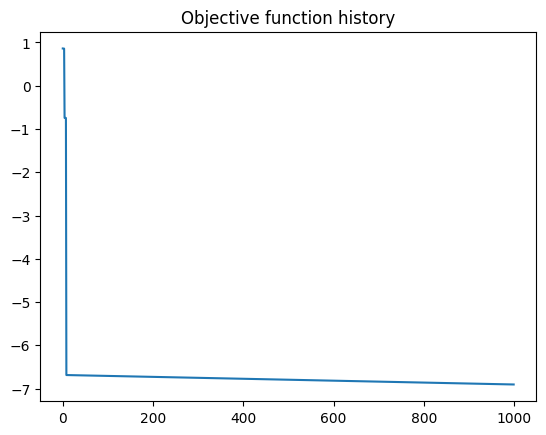

Experiment for batch_size= 50 gamma_val = 0.1 and lambda_val = 0.0001


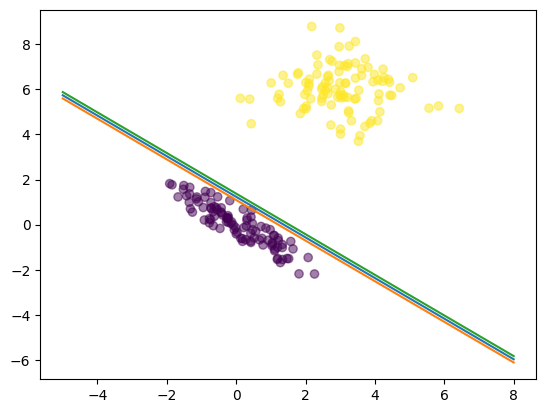

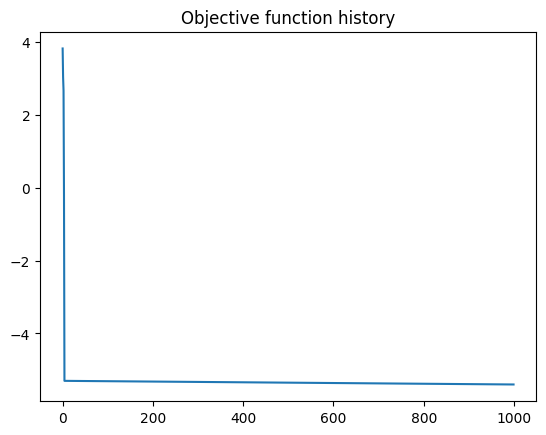

Experiment for batch_size= 10 gamma_val = 1 and lambda_val = 0.01


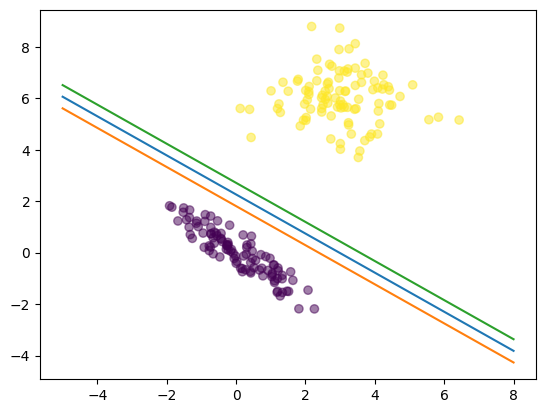

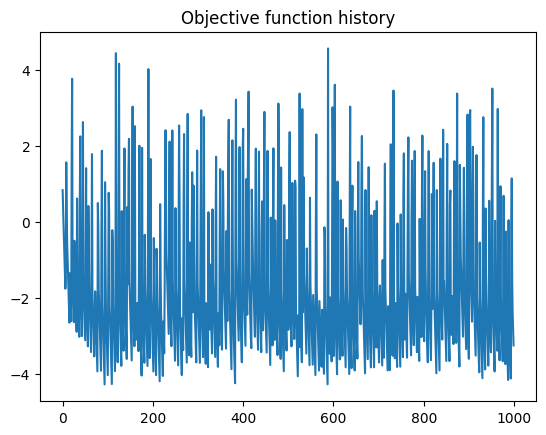

Experiment for batch_size= 20 gamma_val = 1 and lambda_val = 0.01


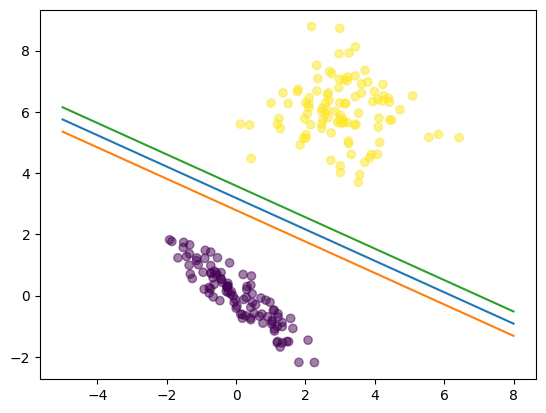

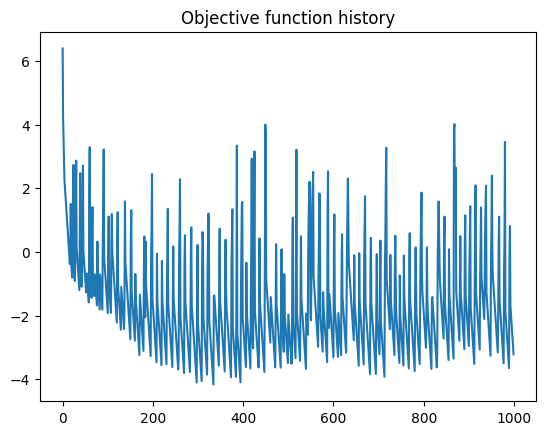

Experiment for batch_size= 50 gamma_val = 1 and lambda_val = 0.01


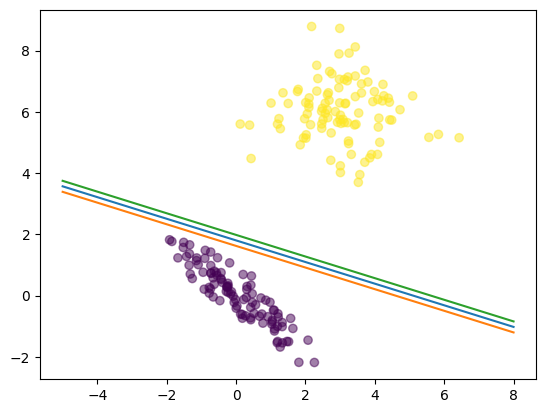

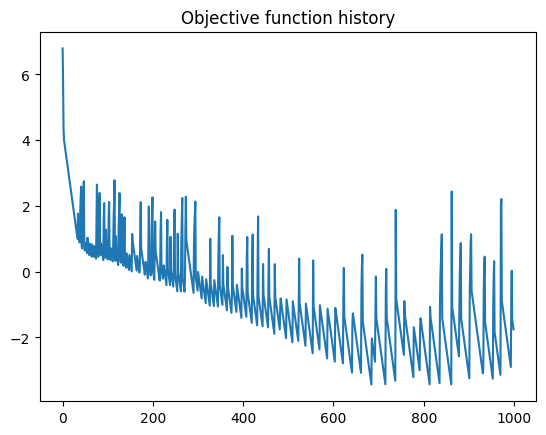

Experiment for batch_size= 10 gamma_val = 1 and lambda_val = 0.0001


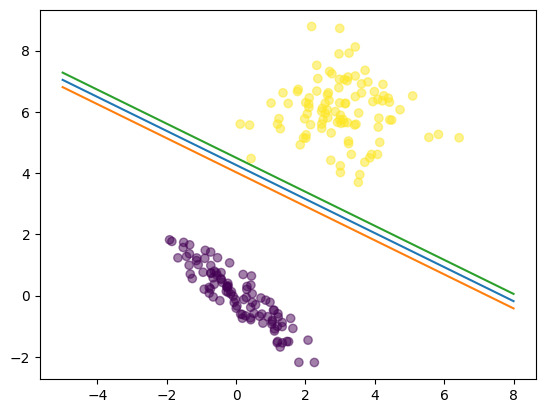

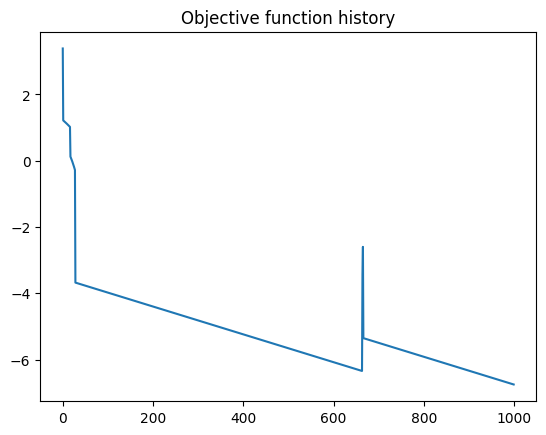

Experiment for batch_size= 20 gamma_val = 1 and lambda_val = 0.0001


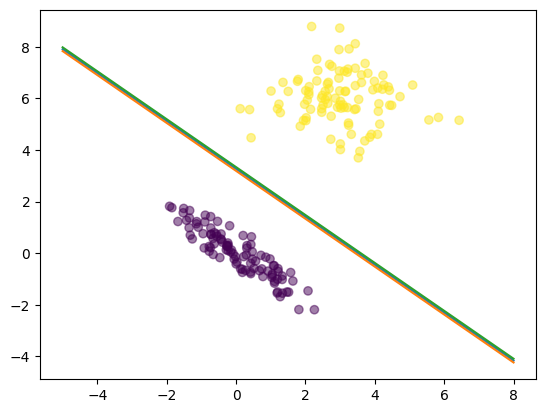

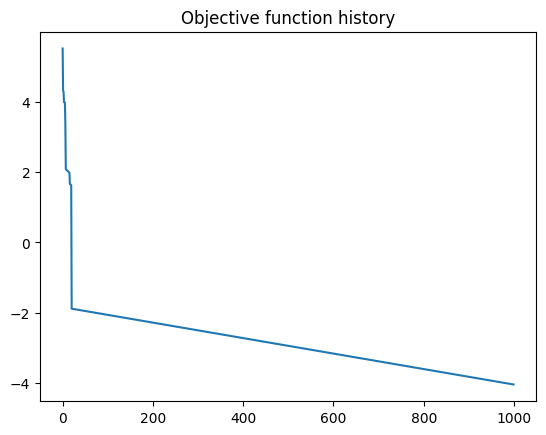

Experiment for batch_size= 50 gamma_val = 1 and lambda_val = 0.0001


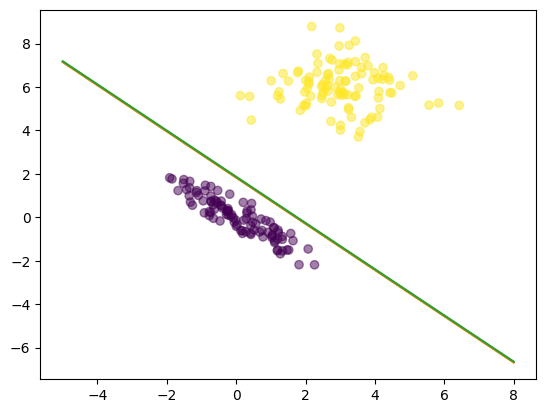

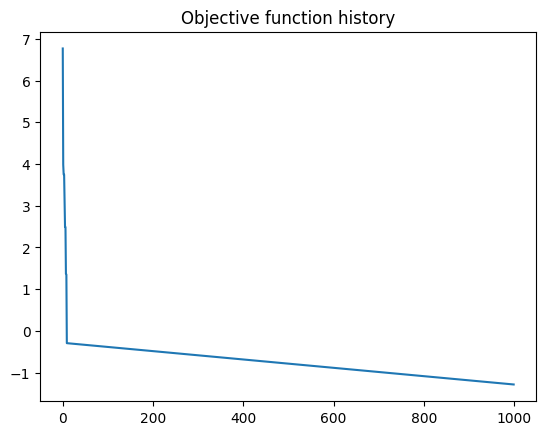

In [85]:
# Generate dataset
X, y = generateDataset(100,100)

for gamma_val in [0.001,0.5, 0.1, 1]:
    for lambda_val in [1e-2, 1e-4]:
        for batch_size_val in [10, 20, 50]:
            print("Experiment for batch_size=", batch_size_val, "gamma_val =", gamma_val, "and lambda_val =", lambda_val)

            # Compute w and b using MBGD
            w, b, history= stoch_grad_mini_batch(1000,np.zeros(2), np.zeros(1), lambda_val, gamma_val, X, y, batch_size=batch_size_val)

            # Plot points, margins and hyperplane
            linespace = np.linspace(-5, 5, 100)

            plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
            a = -w[0] / w[1]
            xx = np.linspace(-5, 8)
            yy = (a * xx) - ((b) / w[1])
            yy_max = (a * xx) - ((b+1) / w[1])
            yy_min = (a * xx) - ((b-1) / w[1])
            plt.plot(xx,yy)
            plt.plot(xx,yy_max)
            plt.plot(xx,yy_min)
            plt.show()

            plt.title('Objective function history')
            plt.plot(history)
            plt.show()

By observing the above plots, we can notice that by changing the batch size the outcomes are not improving much, although the results obtained with any batch size are better than the previous ones.

# Experiment 3




By looking at the comparison of the objective function histories, we can come to the conclusion that the best performances in terms of speed of convergence to the optimal solution, are given out by increasing the batch size and setting $\lambda$ to be a small value, like 0.01.

The best results that we got are for $\gamma$ = 0.001 and $\lambda$ = 0.01


